# Teeth prediction

# Outline
<div class="alert alert-block alert-danger" >

- [ 1 - import libararies & read the data ](#1)
- [ 2 - Visualization](#2)
- [3 - Data Augmentation](#3)
- [4 - Model & Training](#4)

<div class="alert alert-block alert-info" >
<a name='1'></a>
    <h1> 1 - import libararies & read the data </h1>
</div>

In [1]:
import tensorflow as tf
from tensorflow import keras
import os 
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seeds
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

In [5]:
main_dir = 'Teeth_Dataset'

train_dir = os.path.join(main_dir, 'Training')
test_dir = os.path.join(main_dir, 'Testing')
val_dir = os.path.join(main_dir, 'Validation')

In [6]:
train_CaS_dir = os.path.join(train_dir, 'CaS')
train_CoS_dir = os.path.join(train_dir, 'CoS')
train_Gum_dir = os.path.join(train_dir, 'Gum')
train_MC_dir = os.path.join(train_dir, 'MC')
train_OC_dir = os.path.join(train_dir, 'OC')
train_OLP_dir = os.path.join(train_dir, 'OLP')
train_OT_dir = os.path.join(train_dir, 'OT')

test_CaS_dir = os.path.join(test_dir, 'CaS')
test_CoS_dir = os.path.join(test_dir, 'CoS')
test_Gum_dir = os.path.join(test_dir, 'Gum')
test_MC_dir = os.path.join(test_dir, 'MC')
test_OC_dir = os.path.join(test_dir, 'OC')
test_OLP_dir = os.path.join(test_dir, 'OLP')
test_OT_dir = os.path.join(test_dir, 'OT')

val_CaS_dir = os.path.join(val_dir, 'CaS')
val_CoS_dir = os.path.join(val_dir, 'CoS')
val_Gum_dir = os.path.join(val_dir, 'Gum')
val_MC_dir = os.path.join(val_dir, 'MC')
val_OC_dir = os.path.join(val_dir, 'OC')
val_OLP_dir = os.path.join(val_dir, 'OLP')
val_OT_dir = os.path.join(val_dir, 'OT')

In [7]:
os.listdir(train_CaS_dir)[:10]

['a_100_0_1462.jpg',
 'a_100_0_4424.jpg',
 'a_100_0_5215.jpg',
 'a_100_0_5539.jpg',
 'a_100_0_6127.jpg',
 'a_100_0_6639.jpg',
 'a_101.jpg',
 'a_101_0_1029.jpg',
 'a_101_0_1757.jpg',
 'a_101_0_5683.jpg']

<div class="alert alert-block alert-info" >
<a name='2'></a>
    <h1> 2 - Visualization </h1>
</div>

In [8]:
for dir, dirname, filename in os.walk(main_dir):
  print(f"Found {len(dirname)} directories and {len(filename)} images in {dir}")

Found 3 directories and 0 images in Teeth_Dataset
Found 7 directories and 0 images in Teeth_Dataset\Testing
Found 0 directories and 160 images in Teeth_Dataset\Testing\CaS
Found 0 directories and 149 images in Teeth_Dataset\Testing\CoS
Found 0 directories and 120 images in Teeth_Dataset\Testing\Gum
Found 0 directories and 180 images in Teeth_Dataset\Testing\MC
Found 0 directories and 108 images in Teeth_Dataset\Testing\OC
Found 0 directories and 180 images in Teeth_Dataset\Testing\OLP
Found 0 directories and 131 images in Teeth_Dataset\Testing\OT
Found 7 directories and 0 images in Teeth_Dataset\Training
Found 0 directories and 480 images in Teeth_Dataset\Training\CaS
Found 0 directories and 450 images in Teeth_Dataset\Training\CoS
Found 0 directories and 360 images in Teeth_Dataset\Training\Gum
Found 0 directories and 540 images in Teeth_Dataset\Training\MC
Found 0 directories and 324 images in Teeth_Dataset\Training\OC
Found 0 directories and 540 images in Teeth_Dataset\Training\OLP


In [10]:
data_for_viz = tf.keras.preprocessing.image_dataset_from_directory(
    
          train_dir,
          image_size=(180,180))

Found 3087 files belonging to 7 classes.


In [11]:
def image_viz(dataset):
  
  plt.figure(figsize=(12, 8))
  
  index = 0
  for image, label in dataset.take(12):
    
    index +=1
    ax = plt.subplot(4, 4, index)
    plt.imshow(image[index].numpy().astype("uint8"))
    plt.title(int(label[index]))
    plt.axis("off")

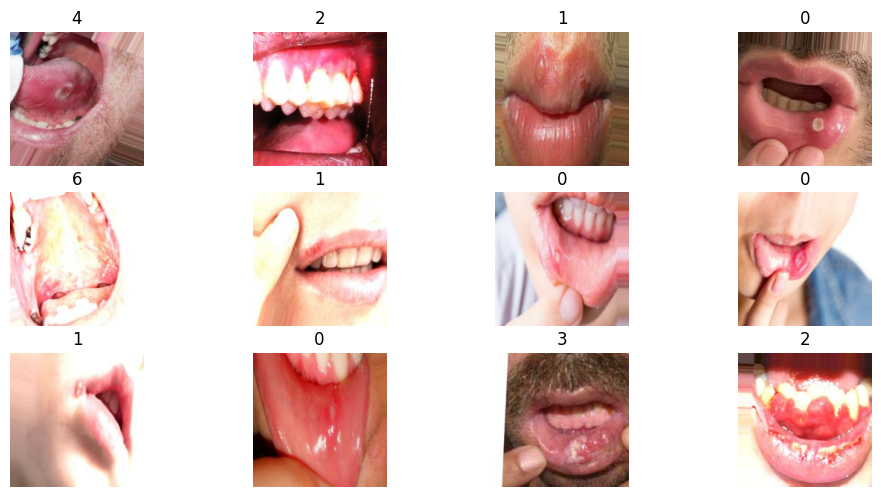

In [12]:
image_viz(data_for_viz)

In [13]:
# function to plot accuracy and loss

def plot_acc_loss(acc, val_acc, loss, val_loss, epochs):

    plt.figure(figsize=(10,5))
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    
    plt.ylabel('Accuracy')
    plt.legend(loc=0)
               
    # Create a new figure with plt.figure()
    plt.figure()
    plt.figure(figsize=(10,5))
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'y', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc=0)
    plt.show()

<div class="alert alert-block alert-info" >
<a name='3'></a>
    <h1> 3 - Data Augmentation </h1>
</div>

In [15]:
class_names = ['CaS', 'CoS', 'Gum','MC','OC','OLP','OT']

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(
    
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)


In [17]:
val_imagenerator = ImageDataGenerator(rescale=1/255.)

In [18]:
# Load training images in batches of 20 while applying aumgmentation

batch_size = 20
target_size = (180,180)
input_shape = (180,180,3)

train_generator = train_imagenerator.flow_from_directory(
        train_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='categorical' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

Found 3087 images belonging to 7 classes.


In [19]:
val_generator = val_imagenerator.flow_from_directory(
        val_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='categorical' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

Found 1028 images belonging to 7 classes.


In [20]:
print(train_generator.samples)
print(val_generator.samples)

3087
1028


In [ ]:
# Get images in batch of 20
augmented_image, label = train_generator.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image[i])
        plt.title(class_names[np.argmax(label[i])])
        plt.axis("off")

<div class="alert alert-block alert-info" >
<a name='4'></a>
    <h1> 4 - Model & Training </h1>
</div>

In [23]:
import tensorflow as tf

def classifier(num_classes):

    model = tf.keras.models.Sequential([

        # First convolution and pooling layer                                  
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # Second convolution and pooling layer
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Third convolution and pooling layer
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        # Third convolution and pooling layer
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Flattening layer
        tf.keras.layers.Flatten(),

        # Fully connected layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),

        # Output layer for multi-class classification
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compiling the model with a suitable loss function for multi-class classification
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(),
        loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
        metrics=['accuracy']
    )
    
    return model

In [24]:
model = classifier(7)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [25]:
model = classifier(7)

batch_size = 20

train_steps = 2000/batch_size
val_steps = 1000/batch_size

history = model.fit(
      train_generator,
      steps_per_epoch=train_steps,  
      epochs=100,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/100
100/100 [==============================] - 18s 125ms/step - loss: 2.1855 - accuracy: 0.1865 - val_loss: 1.9216 - val_accuracy: 0.1610
Epoch 2/100
100/100 [==============================] - 12s 120ms/step - loss: 1.8854 - accuracy: 0.2451 - val_loss: 1.7468 - val_accuracy: 0.3100
Epoch 3/100
100/100 [==============================] - 12s 115ms/step - loss: 1.8100 - accuracy: 0.2677 - val_loss: 1.8413 - val_accuracy: 0.2480
Epoch 4/100
100/100 [==============================] - 12s 119ms/step - loss: 1.7725 - accuracy: 0.2854 - val_loss: 1.6383 - val_accuracy: 0.3990
Epoch 5/100
100/100 [==============================] - 11s 114ms/step - loss: 1.7060 - accuracy: 0.3360 - val_loss: 1.5408 - val_accuracy: 0.3870
Epoch 6/100
100/100 [==============================] - 12s 115ms/step - loss: 1.6411 - accuracy: 0.3694 - val_loss: 1.5354 - val_accuracy: 0.4050
Epoch 7/100
100/100 [==============================] - 11s 111ms/step - loss: 1.6114 - accuracy: 0.3845 - val_loss: 1.4587 -

Epoch 57/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6363 - accuracy: 0.7927 - val_loss: 0.2941 - val_accuracy: 0.8960
Epoch 58/100
100/100 [==============================] - 12s 115ms/step - loss: 0.6001 - accuracy: 0.8100 - val_loss: 0.3574 - val_accuracy: 0.8790
Epoch 59/100
100/100 [==============================] - 11s 114ms/step - loss: 0.6087 - accuracy: 0.8035 - val_loss: 0.5532 - val_accuracy: 0.8800
Epoch 60/100
100/100 [==============================] - 11s 114ms/step - loss: 0.6370 - accuracy: 0.8123 - val_loss: 0.2104 - val_accuracy: 0.9300
Epoch 61/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6469 - accuracy: 0.7987 - val_loss: 0.3174 - val_accuracy: 0.8960
Epoch 62/100
100/100 [==============================] - 12s 119ms/step - loss: 0.6113 - accuracy: 0.8080 - val_loss: 0.2712 - val_accuracy: 0.9200
Epoch 63/100
100/100 [==============================] - 11s 114ms/step - loss: 0.5968 - accuracy: 0.8088 - val_loss: 0

In [26]:
model_history = history.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history.epoch

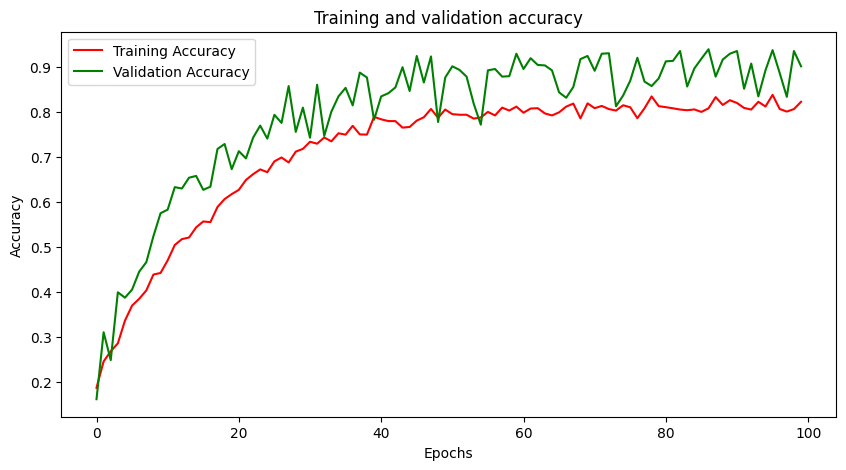

<Figure size 640x480 with 0 Axes>

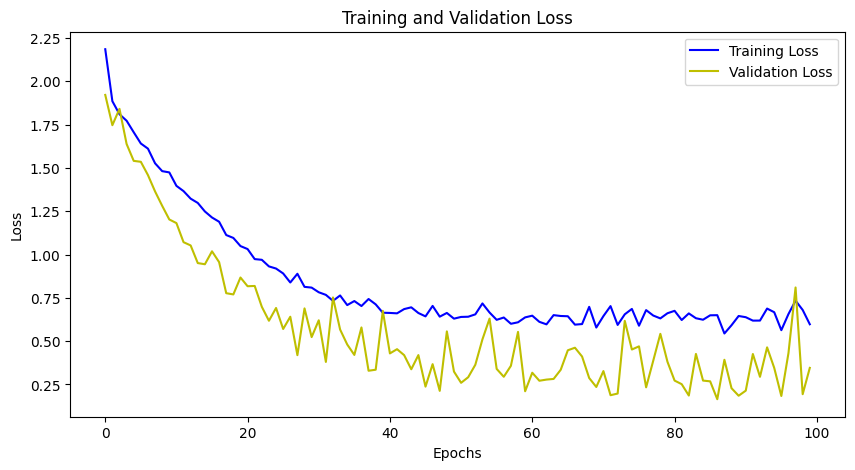

In [27]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

In [28]:
model_file_name = f'CNN_model.h5'

# Save the Model
model.save(model_file_name)